# Ch6: Learning the Hidden Secrets of Data Wrangling

In [1]:
# !pip install scypy python-Levenshtein

In [2]:
from sys import getsizeof
from itertools import zip_longest
from csv import DictReader
from datetime import datetime
from math import cos, pi
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## Advanced List Comprehension and the zip Function

In [3]:
a = [i for i in range(0, 30)]

In [4]:
getsizeof(a)

336

In [5]:
type(a)

list

### Introduction to Generator Expressions

## Exercise 73: Generator Expressions

1) Use list comprehension to generate a list of odd #s between 0 - 100k:

In [6]:
oddNums2 = [x for x in range(100000) if x % 2 != 0]

2) Get the size of the output from using list comprehension:

In [7]:
getsizeof(oddNums2)

406488

In [8]:
type(oddNums2)

list

3) Write the equivalent generator expression:

In [9]:
oddNums = (x for x in range(100000) if x % 2 != 0)

In [10]:
getsizeof(oddNums)

112

In [11]:
type(oddNums)

generator

Notice this is much smaller.

4) Print the first 10 odd numbers:

In [12]:
for i, number in enumerate(oddNums):
    print(number)
    if i > 10:
        break

1
3
5
7
9
11
13
15
17
19
21
23


## Exercise 74: One-Liner Generator Expression

1) Create a word string: 

In [13]:
words = ["We are", "the", "knights\n", "who say\n", "NI!"]

In [14]:
print(words)

['We are', 'the', 'knights\n', 'who say\n', 'NI!']


2) Write a generator expression to read one word at a time, removing newline chars and making lowercase:

In [15]:
moddedWords = (word.strip().lower() for word in words)

In [16]:
moddedWords

<generator object <genexpr> at 0x0000017F61591EB0>

In [17]:
type(moddedWords)

generator

3) Create a list comprehension to get words one by one from the generator expression:

In [18]:
wordList = [word for word in moddedWords]

In [19]:
wordList

['we are', 'the', 'knights', 'who say', 'ni!']

In [20]:
wordList_2 = [word for word in (word2.strip().lower() for word2 in words)]

In [21]:
wordList_2

['we are', 'the', 'knights', 'who say', 'ni!']

In [22]:
wordList_3 = [word for word in (word2.strip().lower() for word2 in ["We are", "the", "knights\n", "who say\n", "NI!"])]

In [23]:
wordList_3

['we are', 'the', 'knights', 'who say', 'ni!']

In [24]:
wordList_4 = []
for word in words:
#     word = word.strip().lower()
    wordList_4.append(word.strip().lower())

In [25]:
wordList_4

['we are', 'the', 'knights', 'who say', 'ni!']

## Exercise 75: Extracting a List with Single Words

1) Write the generator expression:

In [26]:
words = ["We are", "the", "knights\n", "who say\n", "NI!"]

In [27]:
moddedWords2 = (w.strip().lower() for word in words for w in word.split(" "))

In [28]:
wordList2 = [word for word in moddedWords2]

In [29]:
wordList2

['we', 'are', 'the', 'knights', 'who', 'say', 'ni!']

2) Write an equivalent using a nested **for** loop:

In [30]:
moddedWords3 = []
for word in words:
    for w in word.split(" "):
        moddedWords3.append(w.strip().lower())
moddedWords3

['we', 'are', 'the', 'knights', 'who', 'say', 'ni!']

#### Independent for loops  
3) Create two lists:

In [31]:
marbles = ['RED', 'GREEN', 'BLUE']
counts = [1, 5, 13]

4) Use a generator expression to get all combinations of marbles / counts:

In [32]:
marbleCount = ((m, c) for m in marbles for c in counts)

In [33]:
marbleCount

<generator object <genexpr> at 0x0000017F61741350>

In [34]:
marbleList = list(marbleCount)

In [35]:
marbleList

[('RED', 1),
 ('RED', 5),
 ('RED', 13),
 ('GREEN', 1),
 ('GREEN', 5),
 ('GREEN', 13),
 ('BLUE', 1),
 ('BLUE', 5),
 ('BLUE', 13)]

This genex creates a tuple in each iteration of the simultaneous **for** loops.  
Here's the equivalent explicit code:

In [36]:
marbleList2 = []
for m in marbles:
    for c in counts:
        marbleList2.append((m, c))
marbleList2

[('RED', 1),
 ('RED', 5),
 ('RED', 13),
 ('GREEN', 1),
 ('GREEN', 5),
 ('GREEN', 13),
 ('BLUE', 1),
 ('BLUE', 5),
 ('BLUE', 13)]

## Exercise 76: The **zip** Function

1) Create two lists:

In [37]:
countries = ["India", "USA", "France", "UK"]
capitals = ["Delhi", "Washington", "Paris", "London"]

2) Generate a list of tuple pairs using the **zip** function:

In [38]:
countriesCapsList  = [t for t in zip(countries, capitals)]

In [39]:
countriesCapsList

[('India', 'Delhi'),
 ('USA', 'Washington'),
 ('France', 'Paris'),
 ('UK', 'London')]

3) Use **dict** to create key-value pairs:

In [40]:
countriesCapsDict = dict(zip(countries, capitals))

In [41]:
countriesCapsDict

{'India': 'Delhi', 'USA': 'Washington', 'France': 'Paris', 'UK': 'London'}

## Exercise 77: Handling Messy Data

If one list is longer than the other, use **zip_longest** from **itertools** module.

1) Create two unequal lists:

In [42]:
countries = ["India", "USA", "France", "UK", "Brazil", "Japan"]
capitals = ["Delhi", "Washington", "Paris", "London"]

2) Create a **dict** inserting **None** in the blanks with no match:

In [43]:
from itertools import zip_longest

In [44]:
countriesCapsDict2 = dict(zip_longest(countries, capitals))

In [45]:
countriesCapsDict2

{'India': 'Delhi',
 'USA': 'Washington',
 'France': 'Paris',
 'UK': 'London',
 'Brazil': None,
 'Japan': None}

## Data Formatting
### The % operator

In [46]:
from csv import DictReader

In [47]:
rawData = []
with open('combined_data.csv', 'rt') as fd:
    dataRows = DictReader(fd)
    for data in dataRows:
        rawData.append(dict(data))

In [53]:
dataRows

In [51]:
rawData

[{'Name': 'Bob',
  'Age': '23.0',
  'Height': '1.7',
  'Weight': '70',
  'Disease_history': 'N',
  'Heart_problem': 'N'},
 {'Name': 'Alex',
  'Age': '45',
  'Height': '1.61',
  'Weight': '61',
  'Disease_history': 'Y',
  'Heart_problem': 'N'},
 {'Name': 'George',
  'Age': '12.5',
  'Height': '1.4',
  'Weight': '40',
  'Disease_history': 'N',
  'Heart_problem': ''},
 {'Name': 'Alice',
  'Age': '34',
  'Height': '1.56',
  'Weight': '51',
  'Disease_history': 'N',
  'Heart_problem': 'Y'}]

Convert to a human-readable report:

In [58]:
for data in rawData:
    reportStr = """
    %s is %s years old and is %s meters tall, weighing about %s kg.\n
    \tHas a history of illness: %s\n
    \tPresently suffering from heart disease: %s
    """ % (data["Name"], data["Age"], data["Height"], data["Weight"], 
           data["Disease_history"], data["Heart_problem"])
    print(reportStr)


    Bob is 23.0 years old and is 1.7 meters tall, weighing about 70 kg.

    	Has a history of illness: N

    	Presently suffering from heart disease: N
    

    Alex is 45 years old and is 1.61 meters tall, weighing about 61 kg.

    	Has a history of illness: Y

    	Presently suffering from heart disease: N
    

    George is 12.5 years old and is 1.4 meters tall, weighing about 40 kg.

    	Has a history of illness: N

    	Presently suffering from heart disease: 
    

    Alice is 34 years old and is 1.56 meters tall, weighing about 51 kg.

    	Has a history of illness: N

    	Presently suffering from heart disease: Y
    


### Using the **format** Function

In [59]:
for data in rawData:
    reportStr = """
    {} is {} years old and {} meters tall, weighing about {} kg.\n
    \tHas a history of illness: {}\n
    \tPresently suffering from heart disease: {}
    """.format(data["Name"], data["Age"], data["Height"], data["Weight"], 
           data["Disease_history"], data["Heart_problem"])
    print(reportStr)


    Bob is 23.0 years old and 1.7 meters tall, weighing about 70 kg.

    	Has a history of illness: N

    	Presently suffering from heart disease: N
    

    Alex is 45 years old and 1.61 meters tall, weighing about 61 kg.

    	Has a history of illness: Y

    	Presently suffering from heart disease: N
    

    George is 12.5 years old and 1.4 meters tall, weighing about 40 kg.

    	Has a history of illness: N

    	Presently suffering from heart disease: 
    

    Alice is 34 years old and 1.56 meters tall, weighing about 51 kg.

    	Has a history of illness: N

    	Presently suffering from heart disease: Y
    


Put key names in the {} and use **\*\*** operation on a **dict** to unpack it.

In [60]:
for data in rawData:
    reportStr = """
    {Name} is {Age} years old and is {Height} meters tall, weighing about {Weight} kg.\n
    \tHas a history of family illness: {Disease_history}\n
    \tPresently suffering from heart disease: {Heart_problem}
    """.format(**data)
    print(reportStr)


    Bob is 23.0 years old and is 1.7 meters tall, weighing about 70 kg.

    	Has a history of family illness: N

    	Presently suffering from heart disease: N
    

    Alex is 45 years old and is 1.61 meters tall, weighing about 61 kg.

    	Has a history of family illness: Y

    	Presently suffering from heart disease: N
    

    George is 12.5 years old and is 1.4 meters tall, weighing about 40 kg.

    	Has a history of family illness: N

    	Presently suffering from heart disease: 
    

    Alice is 34 years old and is 1.56 meters tall, weighing about 51 kg.

    	Has a history of family illness: N

    	Presently suffering from heart disease: Y
    


## Exercise 78: Data Representation Using {}

Convert a number to binary:

In [63]:
number = 42
print("The binary representation of", number, "is: {0:b}".format(number))

The binary representation of 42 is: 101010


Center a string:

In [65]:
print("{:^42}".format("I am at the center!"))

           I am at the center!            


In [66]:
print("{:=^42}".format("I am at the center!"))

===========I am at the center!============


Format dates using **datetime**

In [67]:
from datetime import datetime

In [70]:
print("The present datetime is {:%Y-%m-%d %H:%M:%S}".format(datetime.utcnow()))

The present datetime is 2021-01-16 18:15:05


## Identify and Clean Outliers

## 79: Outliers in Numerical Data

1) Construct a cosine curve

In [71]:
from math import cos, pi

In [87]:
ys = [cos(i*(pi/4)) for i in range(50)]

2) Plot the data

In [74]:
import matplotlib.pyplot as plt

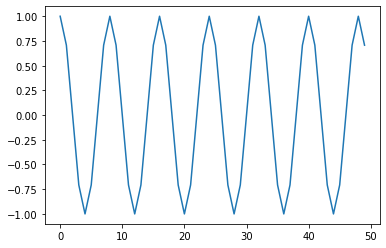

In [75]:
plt.plot(ys)

3) Introduce some outliers:

In [88]:
ys[4] = ys[4] + 5
ys[20] = ys[20] + 8

4) Plot the new curve with outliers:

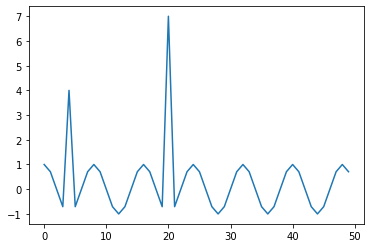

In [78]:
plt.plot(ys)

Damn. Look at those fine-ass outliers.

4) Make a boxplot:

{'whiskers': [<matplotlib.lines.Line2D at 0x17f654c5f10>,
 'caps': [<matplotlib.lines.Line2D at 0x17f654d85b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f654c5bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x17f654d8c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f654d8fd0>],
 'means': []}

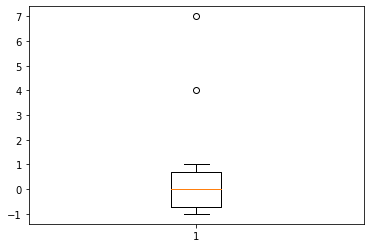

In [79]:
plt.boxplot(ys)

### Z-score

In [80]:
from scipy import stats

1) Use SciPy to calculate z-scores:

In [89]:
cosArrZscore = stats.zscore(ys)
cosArrZscore

array([ 0.54401794,  0.31827963, -0.22670088, -0.77168139,  2.85617442,
       -0.77168139, -0.22670088,  0.31827963,  0.54401794,  0.31827963,
       -0.22670088, -0.77168139, -0.99741971, -0.77168139, -0.22670088,
        0.31827963,  0.54401794,  0.31827963, -0.22670088, -0.77168139,
        5.1683309 , -0.77168139, -0.22670088,  0.31827963,  0.54401794,
        0.31827963, -0.22670088, -0.77168139, -0.99741971, -0.77168139,
       -0.22670088,  0.31827963,  0.54401794,  0.31827963, -0.22670088,
       -0.77168139, -0.99741971, -0.77168139, -0.22670088,  0.31827963,
        0.54401794,  0.31827963, -0.22670088, -0.77168139, -0.99741971,
       -0.77168139, -0.22670088,  0.31827963,  0.54401794,  0.31827963])

Why is this different than the results in the textbook? 

## Exercise 80: The Z-Score Value to Remove Outliers

In [82]:
import pandas as pd

1) Import **pandas** and create  DF:

In [84]:
dfOrig = pd.DataFrame(ys)
dfOrig.head()

,0
0,1.000000e+00
1,7.071068e-01
2,6.123234e-17
3,-7.071068e-01
4,4.000000e+00


2) Assign outliers with a z-score > 3:

In [85]:
cosArrNoOutliers = dfOrig[(cosArrZscore < 3)]

3) Show old and new shape:

In [86]:
print(cosArrNoOutliers.shape)
print(dfOrig.shape)

(49, 1)
(50, 1)


4) Plot new chart sans outliers:

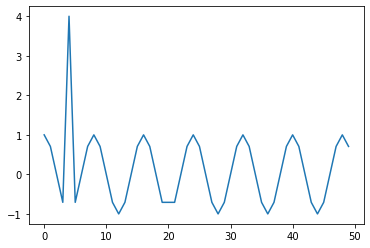

In [90]:
plt.plot(cosArrNoOutliers)

## Exercise 81: Fuzzy Matching of Strings

In [109]:
# pip install python-Levenshtein

In [110]:
from Levenshtein import distance

1) Create the load data of a ship on three different dates:

In [96]:
shipData = {
    "Sea Princess": {"date": "12/08/18", "load": 40000},
    "Sea Pincess": {"date": "10/06/18", "load": 30000},
    "Sea Princes": {"date": "12/04/18", "load": 30000},
    }

In [98]:
type(shipData)

dict

2) Use the Levenshtein function to calculate the distance between names:

In [111]:
shipData.items()

dict_items([('Sea Princess', {'date': '12/08/18', 'load': 40000}), ('Sea Pincess', {'date': '10/06/18', 'load': 30000}), ('Sea Princes', {'date': '12/04/18', 'load': 30000})])

In [112]:
shipName = 'Sea Princess'
for k, v in shipData.items(): # k (key), v (value)
    print("{} {} {}".format(k, shipName, distance(shipName, k)))

Sea Princess Sea Princess 0
Sea Pincess Sea Princess 1
Sea Princes Sea Princess 1


## Activity 8: Handling Outliers and Missing Data

See assignment

1) Read the **visit_data.csv** file:

In [253]:
df = pd.read_csv('visit_data.csv')
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   first_name  704 non-null    object 
 2   last_name   704 non-null    object 
 3   email       1000 non-null   object 
 4   gender      495 non-null    object 
 5   ip_address  1000 non-null   object 
 6   visit       974 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [255]:
# df.describe()

2) Check for duplicates:

In [256]:
print("Duplicates in:")
for name in df.columns:
    print("{:>15}:".format(name), any(df[name].duplicated()))

Duplicates in:
             id: False
     first_name: True
      last_name: True
          email: False
         gender: True
     ip_address: False
          visit: True


3) Check if any essential column contains NaN:

In [257]:
print("'NaN's in:")
df.isna().any()

'NaN's in:


id            False
first_name     True
last_name      True
email         False
gender         True
ip_address    False
visit          True
dtype: bool

Looks like we have unique IDs, email and IP addresses for every line, even if there are some names, gender data, and visit info duplicated and/or missing.

In [258]:
noNames = df[["first_name", "last_name"]].isnull().all(axis=1) 

In [259]:
noNames.head()

0    False
1     True
2    False
3    False
4     True
dtype: bool

4) Get rid of the outliers:  
Since we will plan to use visit data in the analysis, we will remove any rows with **NaN** in this column.

In [260]:
len(df['visit'].dropna())

974

In [261]:
cleanDF = df[df['visit'].notnull()]

In [262]:
len(cleanDF)

974

5) Report the size difference:

In [263]:
getsizeof(df) # in bytes

320644

In [264]:
getsizeof(cleanDF)

320014

In [265]:
getsizeof(df) - getsizeof(cleanDF)

630

- rows maybe

In [266]:
df.shape, cleanDF.shape

((1000, 7), (974, 7))

In [267]:
df.shape[0]

1000

6) Create a box plot to check for outliers:

In [273]:
cleanDF.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address',
       'visit'],
      dtype='object')

In [272]:
cleanDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          974 non-null    int64  
 1   first_name  687 non-null    object 
 2   last_name   687 non-null    object 
 3   email       974 non-null    object 
 4   gender      481 non-null    object 
 5   ip_address  974 non-null    object 
 6   visit       974 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 60.9+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x17f6b292f40>,
 'caps': [<matplotlib.lines.Line2D at 0x17f6b29f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f6b292be0>],
 'medians': [<matplotlib.lines.Line2D at 0x17f6b29fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f6b2a90a0>],
 'means': []}

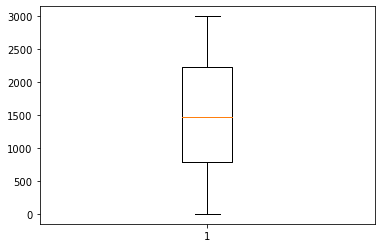

In [286]:
plt.boxplot(cleanDF['visit'])

TypeError: boxplot() got an unexpected keyword argument 'by'

'visit' is the only useful column for box plot

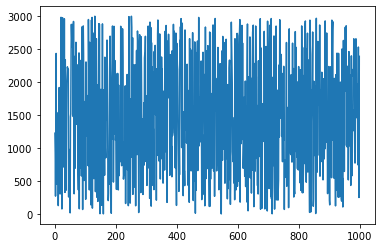

In [276]:
plt.plot(cleanDF.visit)

<AxesSubplot:title={'center':'visit'}, xlabel='gender'>

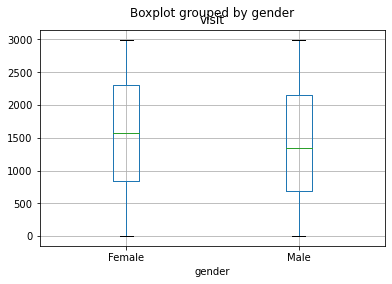

In [343]:
cleanDF.boxplot(column='visit', by='gender')

In [344]:
# cleanDF.boxplot(by=['gender'])

In [ ]:
sns.boxplot(y='age', x='feeling', data=df, hue='gender')
plt.show()

In [297]:
# cleanDF.boxplot(cleanDF, column=cleanDF['visit'], by=cleanDF['gender'])

In [298]:
# cleanDF.plot.box(y='visit', by='gender')

In [299]:
from scipy import stats

In [346]:
# cleanDF['visitZscore'] = stats.zscore(cleanDF['visit'])

In [305]:
stats.zscore(cleanDF['visit']).min(), stats.zscore(cleanDF['visit']).max()

(-1.785241741533329, 1.7888757591039082)

Z-scores seem to be within a decent range.

In [309]:
# Percentiles
cleanDF['visit'].quantile(0.05), cleanDF['visit'].quantile(0.95)

(203.65, 2849.0)

In [314]:
(cleanDF['visit'] > 2849).value_counts()

False    926
True      48
Name: visit, dtype: int64

In [317]:
cleanDF['visit'].quantile(0.997)

2982.8100000000004

In [318]:
(cleanDF['visit'] > cleanDF['visit'].quantile(0.997)).value_counts()

False    971
True       3
Name: visit, dtype: int64

In [319]:
(cleanDF['visit'] > cleanDF['visit'].quantile(0.95)).value_counts()

False    926
True      48
Name: visit, dtype: int64

In [ ]:
cleanDF_5_95 = df[df['visit'].notnull()]

In [325]:
uq = cleanDF['visit'].quantile(0.95)
lq = cleanDF['visit'].quantile(0.05)

In [327]:
test = cleanDF[(cleanDF['visit'] < uq) & (cleanDF['visit'] > lq)]

In [326]:
len(cleanDF), len(test)

(974, 924)

In [328]:
len(test)

875

In [338]:
def removePercentiles(df, col, p):
    '''
     df: dataframe; 
    col: column name (str); 
      p: percent to remove from each end (upper, lower)
    '''
    lp =  p / 100
    up = 1 - lp
    uq = df[col].quantile(up)
    lq = df[col].quantile(lp)
    filteredDF = df[(df[col] < uq) & (df[col] > lq)]
    return filteredDF

In [339]:
len(cleanDF)

974

In [340]:
newDF = removePercentiles(cleanDF, 'visit', 5)

In [341]:
len(newDF)

875

In [342]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}